In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

Train scale-insensitive models:

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

Train scale-sensitive models:

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# here we fit the train data
x_train_scaled = scaler.fit_transform(x_train)
# here we just transform the test data
x_test_scaled = scaler.transform(x_test)

#Note: we dont scale the y values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [14]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [16]:
# Notes:
# Accuracy shows how often a classification ML model is correct overall
# accuracy = correct predictions/All predictions 
# accuracy= True Positive + True Negative/ True Positive + True Negative + False Positive + False Negative

# Precision shows how often a ML model correctly predicts the positive class
# precision = True Positive/ True Positive + False Positive

# Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset
# recall = True Positive/ True Positive + False Negative


Find Accuracy score for all models:

In [15]:
forest.score(x_test, y_test), gnb.score(x_test, y_test), gbc.score(x_test, y_test), knn.score(x_test_scaled, y_test), lr.score(x_test_scaled, y_test), svc.score(x_test_scaled, y_test)

(0.961038961038961,
 0.8311688311688312,
 0.9383116883116883,
 0.8701298701298701,
 0.8571428571428571,
 0.8961038961038961)

Find Precision score for all models:

In [18]:
from sklearn.metrics import precision_score

forest_pred = forest.predict(x_test)
gnb_pred = gnb.predict(x_test)
gbc_pred = gbc.predict(x_test)
knn_pred = knn.predict(x_test_scaled)
lr_pred = lr.predict(x_test_scaled)
svc_pred = svc.predict(x_test_scaled)

precision_score(y_test, forest_pred), precision_score(y_test, gnb_pred), precision_score(y_test, gbc_pred), precision_score(y_test, knn_pred), precision_score(y_test, lr_pred), precision_score(y_test, svc_pred)

(0.9735099337748344,
 0.8083832335329342,
 0.9533333333333334,
 0.8807947019867549,
 0.8284023668639053,
 0.9019607843137255)

Find recall score for all models:

In [19]:
from sklearn.metrics import recall_score

forest_pred = forest.predict(x_test)
gnb_pred = gnb.predict(x_test)
gbc_pred = gbc.predict(x_test)
knn_pred = knn.predict(x_test_scaled)
lr_pred = lr.predict(x_test_scaled)
svc_pred = svc.predict(x_test_scaled)

recall_score(y_test, forest_pred), recall_score(y_test, gnb_pred), recall_score(y_test, gbc_pred), recall_score(y_test, knn_pred), recall_score(y_test, lr_pred), recall_score(y_test, svc_pred)

(0.9483870967741935,
 0.8709677419354839,
 0.9225806451612903,
 0.8580645161290322,
 0.9032258064516129,
 0.8903225806451613)

In [ ]:
# with our analysis we understad that the best model is the Random Forest Classifier 
# we can also use the confusion matrix to see the performance of the model
from sklearn.metrics import confusion_matrix

forest_pred = forest.predict(x_test)    
confusion_matrix(y_test, forest_pred)

array([[149,   4],
       [  8, 147]], dtype=int64)

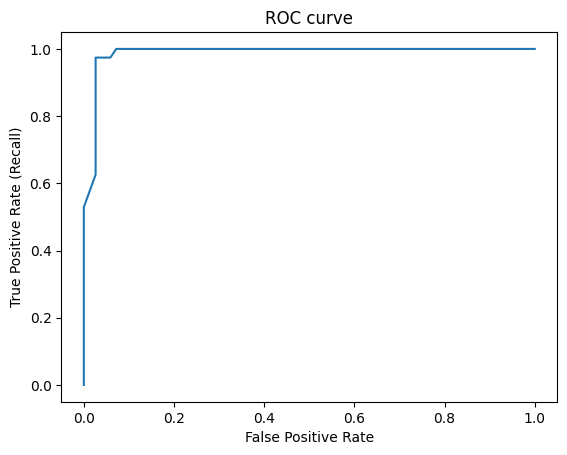

0.9879401222854733

In [22]:
# will plot the roc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve')
plt.show()

roc_auc_score(y_test, y_probs)

Hyperparameter Tuning:

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # n estimation parameters is for number of trees in the forest
    'n_estimators': [100, 200, 500],
    # max depth parameters is for maximum depth of the tree
   'max_depth': [None, 10, 20, 30],
   # min_samples_split parameters is for minimum number of samples required to split an internal node
   'min_samples_split': [2, 5, 10],
   # min_samples_leaf parameters is for minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4],
    # max_features parameters is for number of features to consider when looking for the best split
    'max_features': ['sqrt', 'log2', None]}

forest = RandomForestClassifier(n_jobs=-1, random_state=10)

# cross validation is for training the model on different subsets of the data to avoid overfitting
# n_jobs is for number of jobs to run in parallel and -1 for training the model on all cores
# verbose is for the level of verbosity of the output
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [30]:
best_forest = grid_search.fit(x_train, y_train)
best_forest

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

Find Feature importance:

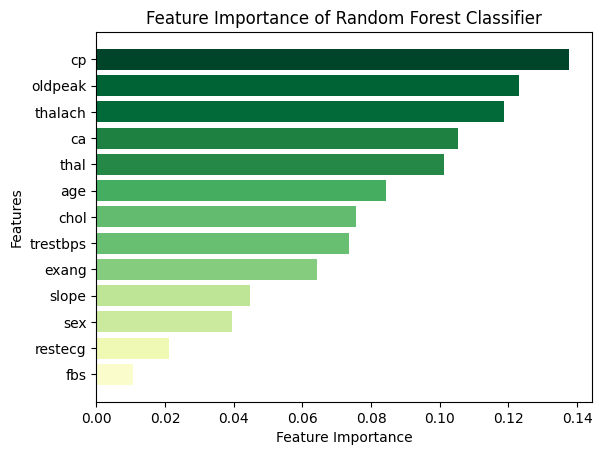

In [33]:
import numpy as np

feature_importances = best_forest.best_estimator_.feature_importances_
features = best_forest.feature_names_in_

sorted_indices = np.argsort(feature_importances)
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest Classifier')

plt.show()

Feature correlations:

<Axes: >

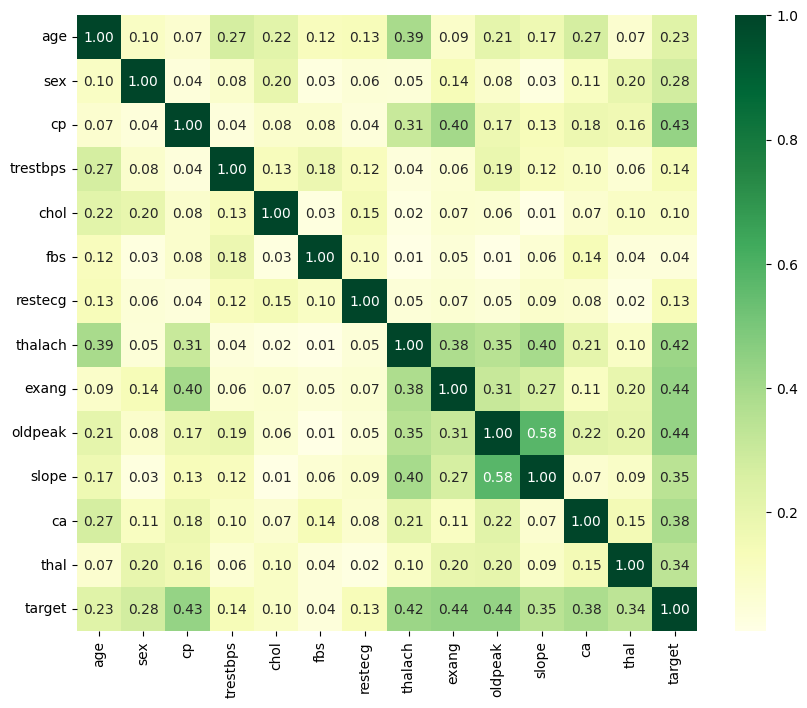

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn', fmt='.2f')

Find score with best forest

In [36]:
best_forest.score(x_test, y_test)

0.961038961038961